# In this ,we try to recognise a batter's stats against particular bowling style in the last 3 years

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## this contains player information along with their id

In [177]:
#players data
players = pd.read_csv('./data/ipl_players_info.csv')
players.head()

,player_id,player_object_id,player_name,dob,dod,gender,batting_style,bowling_style,country_id,image_url,image_metadata
0,102743,1151278,Yashasvi Jaiswal,2001-12-28,NaN,M,left-hand bat,legbreak,6,"https://img1.hscicdn.com/image/upload/f_auto,t...","{""id"": 356803, ""objectId"": 1365015, ""slug"": ""y..."
1,48405,34102,Rohit Sharma,1987-04-30,NaN,M,right-hand bat,right-arm offbreak,6,"https://img1.hscicdn.com/image/upload/f_auto,t...","{""id"": 302374, ""objectId"": 1220570, ""slug"": ""r..."
2,7568,51880,Chris Gayle,1979-09-21,NaN,M,left-hand bat,right-arm offbreak,4,"https://img1.hscicdn.com/image/upload/f_auto,t...","{""id"": 309058, ""objectId"": 1232572, ""slug"": ""c..."
3,8742,35582,Robin Uthappa,1985-11-11,NaN,M,right-hand bat,right-arm medium,6,"https://img1.hscicdn.com/image/upload/f_auto,t...","{""id"": 309247, ""objectId"": 1232905, ""slug"": ""r..."
4,6256,5939,Michael Hussey,1975-05-27,NaN,M,left-hand bat,right-arm medium,2,"https://img1.hscicdn.com/image/upload/f_auto,t...","{""id"": 202597, ""objectId"": 817129, ""slug"": ""mi..."


In [178]:
players['batting_style'].unique()

array(['left-hand bat', 'right-hand bat'], dtype=object)

#### Batting style is either left-hand or right-hand, but bowler_style needs some correction

In [179]:
players['bowling_style'].unique()

array(['legbreak', 'right-arm offbreak', 'right-arm medium', nan,
       'legbreak googly', 'right-arm fast-medium',
       'slow left-arm orthodox', 'right-arm fast', 'left-arm fast-medium',
       'left-arm medium', 'right-arm medium-fast', 'left-arm medium-fast',
       'left-arm fast', 'left-arm wrist-spin'], dtype=object)

#### we categorise  legbreak googly and legbreak as right-arm leg break

In [180]:
#change legbreak googly to right-arm leg break
players['bowling_style']=players['bowling_style'].apply(lambda x: 'right-arm leg break' if x in ['legbreak googly','legbreak'] else x)
players['bowling_style'].unique()

array(['right-arm leg break', 'right-arm offbreak', 'right-arm medium',
       nan, 'right-arm fast-medium', 'slow left-arm orthodox',
       'right-arm fast', 'left-arm fast-medium', 'left-arm medium',
       'right-arm medium-fast', 'left-arm medium-fast', 'left-arm fast',
       'left-arm wrist-spin'], dtype=object)

In [181]:
#create new column bowling_arm from bowling_style for not nan values, if left word is present in bowling_style then left-arm else right-arm
players['bowling_arm']=players['bowling_style'].apply(lambda x: None if pd.isnull(x) else 'left-arm' if 'left' in x else 'right-arm' if 'right' in x else None)
print("NUmber of bowlers with left arm and right arm",players['bowling_arm'].value_counts())


NUmber of bowlers with left arm and right arm bowling_arm
right-arm    512
left-arm     129
Name: count, dtype: int64


In [182]:
#group by bowling arm and count number of bowling styles for each arm
print("Number of bowling styles for each arm",players.groupby('bowling_arm')['bowling_style'].nunique())

Number of bowling styles for each arm bowling_arm
left-arm     6
right-arm    6
Name: bowling_style, dtype: int64


## this dataframe contains information about batting card of each player in each match

#### getting batter id

In [183]:
batter_name='Shivam Dube'
batter_id=players[players['player_name']==batter_name]['player_id'].values[0]
batter_id

74975

In [184]:
#batting data
batting = pd.read_csv('./data/ipl_batting_card.csv')
batting.head()

,match_id,innings,team,batsman_id,batsman_position,runs,balls,fours,sixes,strikerate,isout,wickettype,fielders,bowler_id
0,419122,1,KKR,7568.0,1.0,75.0,60.0,7.0,2.0,125.00,True,lbw,NaN,7678.0
1,419122,1,KKR,2024.0,2.0,31.0,34.0,5.0,0.0,91.17,True,bowled,NaN,7139.0
2,419122,1,KKR,6377.0,3.0,31.0,23.0,3.0,0.0,134.78,True,bowled,NaN,7678.0
3,419122,1,KKR,47023.0,4.0,3.0,3.0,0.0,0.0,100.00,False,not out,{-},NaN
4,419148,1,KKR,2024.0,1.0,33.0,32.0,2.0,2.0,103.12,True,caught,{1973},10556.0


In [185]:
#filtering data for a particular player
batter_data=batting[batting['batsman_id']==batter_id]
batter_data

,match_id,innings,team,batsman_id,batsman_position,runs,balls,fours,sixes,strikerate,isout,wickettype,fielders,bowler_id
180,1304079,2,Super Kings,74975.0,5.0,13.0,14.0,0.0,1.0,92.85,True,caught,{75325},80807.0
544,1359486,2,Super Kings,74975.0,5.0,28.0,26.0,2.0,1.0,107.69,True,bowled,NaN,103701.0
1075,1370350,1,Super Kings,74975.0,4.0,1.0,3.0,0.0,0.0,33.33,True,bowled,NaN,105215.0
1420,1304063,1,Super Kings,74975.0,5.0,3.0,5.0,0.0,0.0,60.00,True,caught,{108529},79597.0
1735,1304057,2,Super Kings,74975.0,6.0,57.0,30.0,6.0,3.0,190.00,True,caught,{101430},59832.0
1988,1175356,1,RCB,74975.0,6.0,2.0,5.0,0.0,0.0,40.00,True,caught,{10125},19422.0
2072,1254093,1,Royals,74975.0,4.0,3.0,8.0,0.0,0.0,37.50,True,bowled,NaN,57196.0
2187,1216531,1,RCB,74975.0,5.0,23.0,19.0,0.0,2.0,121.05,True,caught,{60530},51421.0
2302,1304084,2,Super Kings,74975.0,4.0,8.0,7.0,1.0,0.0,114.28,True,bowled,NaN,51491.0
2402,1216499,1,RCB,74975.0,5.0,2.0,6.0,0.0,0.0,33.33,True,caught,{61990},70640.0


## this dataframe contains information about all matches and results in IPL

In [186]:
#raed historical data
historical_data = pd.read_csv('./data/ipl_historical.csv')
historical_data

,season,title,match_id,match_name,series_id,series_name,match_date,match_format,team1_id,team1_name,...,umpire2,match_referee,toss_winner,toss_winner_choice,match_winner,match_result_text,mom_player,team1_playing11,team2_playing11,debut_players
0,2008,1st match,335982,Royal Challengers Bangalore Vs Kolkata Knight ...,313494,Indian Premier League in India - 2008 (2007/08),2008-04-18,T20,4341,KKR,...,RE Koertzen,J Srinath,RCB,bowl,KKR,KKR won by 140 runs,10384.0,"[""2024"",""10384"",""2230"",""11984"",""19647"",""7704"",...","[""2281"",""7130"",""49752"",""2232"",""12049"",""3947"",""...","[""48965""]"
1,2008,2nd match,335983,Kings Xi Punjab Vs Chennai Super Kings 2Nd Match,313494,Indian Premier League in India - 2008 (2007/08),2008-04-19,T20,4343,Super Kings,...,SL Shastri,S Venkataraghavan,Super Kings,bat,Super Kings,Super Kings won by 33 runs,6256.0,"[""9900"",""2119"",""6256"",""7593"",""15716"",""9989"",""8...","[""15851"",""9235"",""9587"",""7716"",""6259"",""11399"",""...","[""53549""]"
2,2008,3rd match,335984,Delhi Daredevils Vs Rajasthan Royals 3Rd Match,313494,Indian Premier League in India - 2008 (2007/08),2008-04-19,T20,4345,Royals,...,GA Pratapkumar,GR Viswanath,Royals,bat,Daredevils,Daredevils won by 9 wickets (with 29 balls rem...,11374.0,"[""54936"",""15473"",""10125"",""7632"",""3329"",""49247""...","[""7773"",""7781"",""15887"",""47624"",""8813"",""7520"",""...","[""51109"",""47100"",""54936""]"
3,2008,4th match,335986,Kolkata Knight Riders Vs Deccan Chargers 4Th M...,313494,Indian Premier League in India - 2008 (2007/08),2008-04-20,T20,4347,Chargers,...,K Hariharan,FM Engineer,Chargers,bat,KKR,KKR won by 5 wickets (with 6 balls remaining),11984.0,"[""4176"",""8163"",""3317"",""4382"",""48405"",""9570"",""7...","[""51216"",""10384"",""2230"",""2024"",""11984"",""19647""...","[""3317""]"
4,2008,5th match,335985,Mumbai Indians Vs Royal Challengers Bangalore ...,313494,Indian Premier League in India - 2008 (2007/08),2008-04-20,T20,4346,Mumbai,...,SJ Davis,J Srinath,Mumbai,bat,RCB,RCB won by 5 wickets (with 2 balls remaining),3947.0,"[""17850"",""1988"",""7447"",""8742"",""48349"",""47308"",...","[""2120"",""2281"",""44930"",""2232"",""49752"",""3947"",""...","[""7804""]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,2023,69th Match,1359543,Mumbai Indians Vs Sunrisers Hyderabad 69Th Match,1345038,Indian Premier League in India - 2023 (2023),2023-05-21,T20,5143,Sunrisers,...,RJ Tucker,P Dharmani,Mumbai,bowl,Mumbai,Mumbai won by 8 wickets (with 12 balls remaining),96335.0,"[""101306"",""108645"",""59599"",""61634"",""80639"",""70...","[""75325"",""48405"",""96335"",""61990"",""83439"",""1027...",[]
1021,2023,Qualifier 1,1370350,Chennai Super Kings Vs Gujarat Titans Qualifier 1,1345038,Indian Premier League in India - 2023 (2023),2023-05-23,T20,4343,Super Kings,...,CB Gaffaney,M Nayyar,Titans,bowl,Super Kings,Super Kings won by 15 runs,95094.0,"[""105938"",""95094"",""58403"",""74975"",""51096"",""899...","[""66722"",""51216"",""95316"",""70633"",""61690"",""5389...",[]
1022,2023,Eliminator,1370351,Lucknow Super Giants Vs Mumbai Indians Eliminator,1345038,Indian Premier League in India - 2023 (2023),2023-05-24,T20,4346,Mumbai,...,VK Sharma,V Narayan Kutty,Mumbai,bat,Mumbai,Mumbai won by 81 runs,106837.0,"[""75325"",""48405"",""96335"",""61990"",""104396"",""834...","[""95329"",""56832"",""88977"",""63224"",""54212"",""1027...",[]
1023,2023,Qualifier 2,1370352,Gujarat Titans Vs Mumbai Indians Qualifier 2,1345038,Indian Premier League in India - 2023 (2023),2023-05-26,T20,6904,Titans,...,RJ Tucker,J Srinath,Mumbai,bowl,Titans,Titans won by 62 runs,95316.0,"[""85975"",""51216"",""95316"",""102753"",""70633"",""791...","[""75325"",""106837"",""48405"",""102738"",""96335"",""61...",[]


In [187]:
#add new column to batter_data named year and get the season from historical data based on match_id
batter_data['year']=batter_data['match_id'].apply(lambda x: historical_data[historical_data['match_id']==x]['season'].values[0])
batter_data=batter_data.sort_values(by='year').reset_index(drop=True)
batter_data

/var/folders/fd/_vqm4qqj113dx_9dmjpjrhfw0000gn/T/ipykernel_7930/1683518410.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batter_data['year']=batter_data['match_id'].apply(lambda x: historical_data[historical_data['match_id']==x]['season'].values[0])


,match_id,innings,team,batsman_id,batsman_position,runs,balls,fours,sixes,strikerate,isout,wickettype,fielders,bowler_id,year
0,1175366,2,RCB,74975.0,6.0,5.0,7.0,1.0,0.0,71.42,True,caught,{64479},46888.0,2019
1,1175356,1,RCB,74975.0,6.0,2.0,5.0,0.0,0.0,40.00,True,caught,{10125},19422.0,2019
2,1175362,2,RCB,74975.0,7.0,9.0,5.0,0.0,1.0,180.00,False,not out,{-},NaN,2019
3,1178421,2,RCB,74975.0,4.0,24.0,16.0,0.0,2.0,150.00,True,caught,{15887},12562.0,2019
4,1216499,1,RCB,74975.0,5.0,2.0,6.0,0.0,0.0,33.33,True,caught,{61990},70640.0,2020
5,1216510,2,RCB,74975.0,7.0,12.0,12.0,0.0,1.0,100.00,True,bowled,NaN,54222.0,2020
6,1216514,2,RCB,74975.0,5.0,NaN,NaN,NaN,NaN,NaN,False,DNB,NaN,NaN,2020
7,1216540,1,RCB,74975.0,7.0,NaN,NaN,NaN,NaN,NaN,False,DNB,NaN,NaN,2020
8,1216531,1,RCB,74975.0,5.0,23.0,19.0,0.0,2.0,121.05,True,caught,{60530},51421.0,2020
9,1216525,1,RCB,74975.0,6.0,22.0,14.0,2.0,1.0,157.14,False,not out,{-},NaN,2020


In [188]:
#remove rows where balls is Nan
batter_data=batter_data[~batter_data['balls'].isna()]
batter_data

,match_id,innings,team,batsman_id,batsman_position,runs,balls,fours,sixes,strikerate,isout,wickettype,fielders,bowler_id,year
0,1175366,2,RCB,74975.0,6.0,5.0,7.0,1.0,0.0,71.42,True,caught,{64479},46888.0,2019
1,1175356,1,RCB,74975.0,6.0,2.0,5.0,0.0,0.0,40.00,True,caught,{10125},19422.0,2019
2,1175362,2,RCB,74975.0,7.0,9.0,5.0,0.0,1.0,180.00,False,not out,{-},NaN,2019
3,1178421,2,RCB,74975.0,4.0,24.0,16.0,0.0,2.0,150.00,True,caught,{15887},12562.0,2019
4,1216499,1,RCB,74975.0,5.0,2.0,6.0,0.0,0.0,33.33,True,caught,{61990},70640.0,2020
5,1216510,2,RCB,74975.0,7.0,12.0,12.0,0.0,1.0,100.00,True,bowled,NaN,54222.0,2020
8,1216531,1,RCB,74975.0,5.0,23.0,19.0,0.0,2.0,121.05,True,caught,{60530},51421.0,2020
9,1216525,1,RCB,74975.0,6.0,22.0,14.0,2.0,1.0,157.14,False,not out,{-},NaN,2020
10,1216547,1,RCB,74975.0,5.0,27.0,10.0,1.0,3.0,270.00,False,not out,{-},NaN,2020
11,1216519,2,RCB,74975.0,7.0,11.0,12.0,0.0,1.0,91.66,True,bowled,NaN,67296.0,2020


In [189]:
print("Number of matches batted by this batter: ", batter_data['match_id'].nunique())

Number of matches batted by this batter:  47


from 2014 to 2022, this batter has batted 124 innings 

## this dataframe contains ball by ball data of each match

In [190]:

ipl_ball_by_ball_data = pd.read_csv('data/ipl_ball_by_ball_data.csv')
ipl_ball_by_ball_data

/var/folders/fd/_vqm4qqj113dx_9dmjpjrhfw0000gn/T/ipykernel_7930/1836058962.py:1: DtypeWarning: Columns (10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  ipl_ball_by_ball_data = pd.read_csv('data/ipl_ball_by_ball_data.csv')


,series_id,match_id,innings_no,batsman_id,bowler_id,over_number,ball_number,over,total_runs,batsman_runs,...,issix,iswicket,byes,legbyes,wides,noballs,penalties,out_player_id,current_innings_runs,current_innings_wickets
0,1165643,1178429,1.0,51216.0,58274.0,1.0,1.0,0.1,1.0,1.0,...,False,False,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0
1,1165643,1178429,1.0,48927.0,58274.0,1.0,2.0,0.2,0.0,0.0,...,False,False,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0
2,1165643,1178429,1.0,48927.0,58274.0,1.0,3.0,0.3,0.0,0.0,...,False,False,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0
3,1165643,1178429,1.0,48927.0,58274.0,1.0,4.0,0.4,0.0,0.0,...,False,False,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0
4,1165643,1178429,1.0,48927.0,58274.0,1.0,5.0,0.5,0.0,0.0,...,False,False,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243652,313494,336013,2.0,11399.0,9022.0,20.0,2.0,19.2,2.0,2.0,...,False,False,0.0,0.0,0.0,0.0,0.0,NaN,163.0,6.0
243653,313494,336013,2.0,11399.0,9022.0,20.0,3.0,19.3,0.0,0.0,...,False,True,0.0,0.0,0.0,0.0,0.0,11399.0,163.0,7.0
243654,313494,336013,2.0,47185.0,9022.0,20.0,4.0,19.4,0.0,0.0,...,False,True,0.0,0.0,0.0,0.0,0.0,47185.0,163.0,8.0
243655,313494,336013,2.0,47184.0,9022.0,20.0,5.0,19.5,0.0,0.0,...,False,True,0.0,0.0,0.0,0.0,0.0,47184.0,163.0,9.0


## we filter out the balls this batter has faced

In [191]:
##filter out ipl_ball_by_ball_data for this batter
batter_ball_by_ball_data=ipl_ball_by_ball_data[ipl_ball_by_ball_data['batsman_id']==batter_id]
batter_ball_by_ball_data

,series_id,match_id,innings_no,batsman_id,bowler_id,over_number,ball_number,over,total_runs,batsman_runs,...,issix,iswicket,byes,legbyes,wides,noballs,penalties,out_player_id,current_innings_runs,current_innings_wickets
1749,1210595,1216531,1.0,74975.0,66116.0,11.0,5.0,10.5,0.0,0.0,...,False,False,0.0,0.0,0.0,0.0,0.0,NaN,87.0,3.0
1750,1210595,1216531,1.0,74975.0,66116.0,11.0,6.0,10.6,1.0,1.0,...,False,False,0.0,0.0,0.0,0.0,0.0,NaN,88.0,3.0
1751,1210595,1216531,1.0,74975.0,54222.0,12.0,1.0,11.1,1.0,1.0,...,False,False,0.0,0.0,0.0,0.0,0.0,NaN,89.0,3.0
1753,1210595,1216531,1.0,74975.0,54222.0,12.0,3.0,11.3,0.0,0.0,...,False,False,0.0,0.0,0.0,0.0,0.0,NaN,90.0,3.0
1754,1210595,1216531,1.0,74975.0,54222.0,12.0,4.0,11.4,2.0,2.0,...,False,False,0.0,0.0,0.0,0.0,0.0,NaN,92.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231603,1345038,1359507,1.0,74975.0,51012.0,17.0,1.0,16.1,1.0,1.0,...,False,False,0.0,0.0,0.0,0.0,0.0,NaN,170.0,2.0
231607,1345038,1359507,1.0,74975.0,51012.0,17.0,5.0,16.4,1.0,1.0,...,False,False,0.0,0.0,0.0,0.0,0.0,NaN,179.0,2.0
231611,1345038,1359507,1.0,74975.0,96758.0,18.0,1.0,17.1,2.0,2.0,...,False,False,0.0,0.0,0.0,0.0,0.0,NaN,188.0,2.0
231612,1345038,1359507,1.0,74975.0,96758.0,18.0,2.0,17.2,6.0,6.0,...,True,False,0.0,0.0,0.0,0.0,0.0,NaN,194.0,2.0


In [192]:
print("Number of matches batted by this batter: ", batter_ball_by_ball_data['match_id'].nunique())

Number of matches batted by this batter:  47


Note : this matches with the filtered batter data we got from batting_card data , data is consistent

In [193]:
#total runs scored by the batter
print("total runs scored by the batter", batter_ball_by_ball_data['batsman_runs'].sum())

total runs scored by the batter 1106.0


In [194]:
#legal balls faced by the batter , where wides= 0
print("Balls faced by the batter",len(batter_ball_by_ball_data[batter_ball_by_ball_data['wides']==0]))

Balls faced by the batter 780


In [195]:
batter_ball_by_ball_dat=batter_ball_by_ball_data[batter_ball_by_ball_data['wides']==0]

In [196]:
#adding year column
batter_ball_by_ball_data['year']=batter_ball_by_ball_data['match_id'].apply(lambda x: historical_data[historical_data['match_id']==x]['season'].values[0])
batter_ball_by_ball_data

/var/folders/fd/_vqm4qqj113dx_9dmjpjrhfw0000gn/T/ipykernel_7930/1499461359.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batter_ball_by_ball_data['year']=batter_ball_by_ball_data['match_id'].apply(lambda x: historical_data[historical_data['match_id']==x]['season'].values[0])


,series_id,match_id,innings_no,batsman_id,bowler_id,over_number,ball_number,over,total_runs,batsman_runs,...,iswicket,byes,legbyes,wides,noballs,penalties,out_player_id,current_innings_runs,current_innings_wickets,year
1749,1210595,1216531,1.0,74975.0,66116.0,11.0,5.0,10.5,0.0,0.0,...,False,0.0,0.0,0.0,0.0,0.0,NaN,87.0,3.0,2020
1750,1210595,1216531,1.0,74975.0,66116.0,11.0,6.0,10.6,1.0,1.0,...,False,0.0,0.0,0.0,0.0,0.0,NaN,88.0,3.0,2020
1751,1210595,1216531,1.0,74975.0,54222.0,12.0,1.0,11.1,1.0,1.0,...,False,0.0,0.0,0.0,0.0,0.0,NaN,89.0,3.0,2020
1753,1210595,1216531,1.0,74975.0,54222.0,12.0,3.0,11.3,0.0,0.0,...,False,0.0,0.0,0.0,0.0,0.0,NaN,90.0,3.0,2020
1754,1210595,1216531,1.0,74975.0,54222.0,12.0,4.0,11.4,2.0,2.0,...,False,0.0,0.0,0.0,0.0,0.0,NaN,92.0,3.0,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231603,1345038,1359507,1.0,74975.0,51012.0,17.0,1.0,16.1,1.0,1.0,...,False,0.0,0.0,0.0,0.0,0.0,NaN,170.0,2.0,2023
231607,1345038,1359507,1.0,74975.0,51012.0,17.0,5.0,16.4,1.0,1.0,...,False,0.0,0.0,0.0,0.0,0.0,NaN,179.0,2.0,2023
231611,1345038,1359507,1.0,74975.0,96758.0,18.0,1.0,17.1,2.0,2.0,...,False,0.0,0.0,0.0,0.0,0.0,NaN,188.0,2.0,2023
231612,1345038,1359507,1.0,74975.0,96758.0,18.0,2.0,17.2,6.0,6.0,...,False,0.0,0.0,0.0,0.0,0.0,NaN,194.0,2.0,2023


In [197]:
#filter out data for the last 3 years
batter_ball_by_ball_data_last_3_years=batter_ball_by_ball_data[batter_ball_by_ball_data['year']>2020]
batter_ball_by_ball_data_last_3_years

,series_id,match_id,innings_no,batsman_id,bowler_id,over_number,ball_number,over,total_runs,batsman_runs,...,iswicket,byes,legbyes,wides,noballs,penalties,out_player_id,current_innings_runs,current_innings_wickets,year
2353,1298423,1304057,2.0,74975.0,101430.0,6.0,4.0,5.4,4.0,4.0,...,False,0.0,0.0,0.0,0.0,0.0,NaN,27.0,4.0,2022
2354,1298423,1304057,2.0,74975.0,101430.0,6.0,5.0,5.5,0.0,0.0,...,False,0.0,0.0,0.0,0.0,0.0,NaN,27.0,4.0,2022
2355,1298423,1304057,2.0,74975.0,101430.0,6.0,6.0,5.6,0.0,0.0,...,False,0.0,0.0,0.0,0.0,0.0,NaN,27.0,4.0,2022
2360,1298423,1304057,2.0,74975.0,107007.0,7.0,5.0,6.5,4.0,4.0,...,False,0.0,0.0,0.0,0.0,0.0,NaN,36.0,4.0,2022
2361,1298423,1304057,2.0,74975.0,107007.0,7.0,6.0,6.6,0.0,0.0,...,False,0.0,0.0,0.0,0.0,0.0,NaN,36.0,4.0,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231603,1345038,1359507,1.0,74975.0,51012.0,17.0,1.0,16.1,1.0,1.0,...,False,0.0,0.0,0.0,0.0,0.0,NaN,170.0,2.0,2023
231607,1345038,1359507,1.0,74975.0,51012.0,17.0,5.0,16.4,1.0,1.0,...,False,0.0,0.0,0.0,0.0,0.0,NaN,179.0,2.0,2023
231611,1345038,1359507,1.0,74975.0,96758.0,18.0,1.0,17.1,2.0,2.0,...,False,0.0,0.0,0.0,0.0,0.0,NaN,188.0,2.0,2023
231612,1345038,1359507,1.0,74975.0,96758.0,18.0,2.0,17.2,6.0,6.0,...,False,0.0,0.0,0.0,0.0,0.0,NaN,194.0,2.0,2023


In [198]:
batter_ball_by_ball_data_last_3_years['bowler_style']=batter_ball_by_ball_data_last_3_years['bowler_id'].apply(lambda x: players[players['player_id']==x]['bowling_style'].values[0])
batter_ball_by_ball_data_last_3_years

/var/folders/fd/_vqm4qqj113dx_9dmjpjrhfw0000gn/T/ipykernel_7930/744890522.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batter_ball_by_ball_data_last_3_years['bowler_style']=batter_ball_by_ball_data_last_3_years['bowler_id'].apply(lambda x: players[players['player_id']==x]['bowling_style'].values[0])


,series_id,match_id,innings_no,batsman_id,bowler_id,over_number,ball_number,over,total_runs,batsman_runs,...,byes,legbyes,wides,noballs,penalties,out_player_id,current_innings_runs,current_innings_wickets,year,bowler_style
2353,1298423,1304057,2.0,74975.0,101430.0,6.0,4.0,5.4,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,NaN,27.0,4.0,2022,left-arm medium-fast
2354,1298423,1304057,2.0,74975.0,101430.0,6.0,5.0,5.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,27.0,4.0,2022,left-arm medium-fast
2355,1298423,1304057,2.0,74975.0,101430.0,6.0,6.0,5.6,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,27.0,4.0,2022,left-arm medium-fast
2360,1298423,1304057,2.0,74975.0,107007.0,7.0,5.0,6.5,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,NaN,36.0,4.0,2022,right-arm fast-medium
2361,1298423,1304057,2.0,74975.0,107007.0,7.0,6.0,6.6,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,36.0,4.0,2022,right-arm fast-medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231603,1345038,1359507,1.0,74975.0,51012.0,17.0,1.0,16.1,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,NaN,170.0,2.0,2023,right-arm fast
231607,1345038,1359507,1.0,74975.0,51012.0,17.0,5.0,16.4,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,NaN,179.0,2.0,2023,right-arm fast
231611,1345038,1359507,1.0,74975.0,96758.0,18.0,1.0,17.1,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,NaN,188.0,2.0,2023,left-arm medium-fast
231612,1345038,1359507,1.0,74975.0,96758.0,18.0,2.0,17.2,6.0,6.0,...,0.0,0.0,0.0,0.0,0.0,NaN,194.0,2.0,2023,left-arm medium-fast


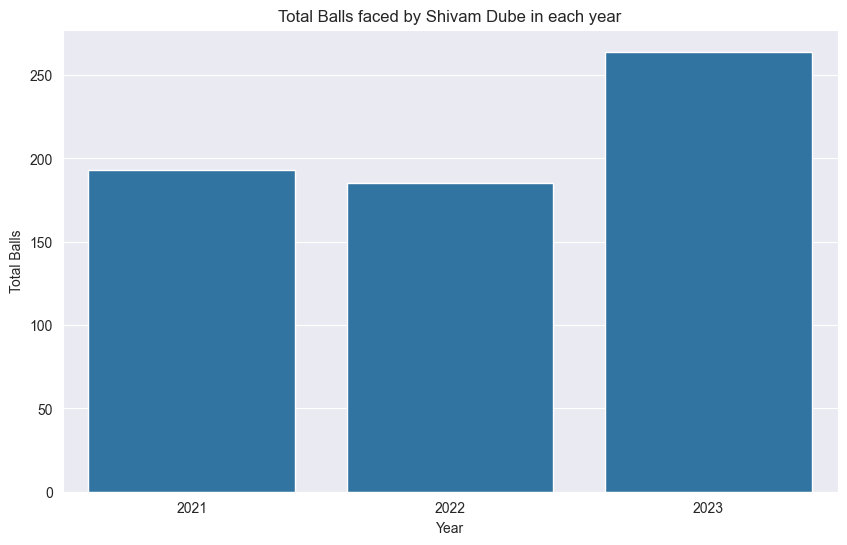

Total balls faced by the batter


year
2023    264
2022    185
2021    193
dtype: int64

In [199]:
#total balls faced by the batter in each year
total_balls=batter_ball_by_ball_data_last_3_years[batter_ball_by_ball_data_last_3_years['wides']==0].groupby('year').size()
#plot total balls faced by the batter in each year
plt.figure(figsize=(10,6))
sns.barplot(x=total_balls.index,y=total_balls)
plt.xlabel('Year')
plt.ylabel('Total Balls')
plt.title('Total Balls faced by '+batter_name + ' in each year')
plt.show()
total_balls=total_balls.sort_index(ascending=False)
print("Total balls faced by the batter")
total_balls

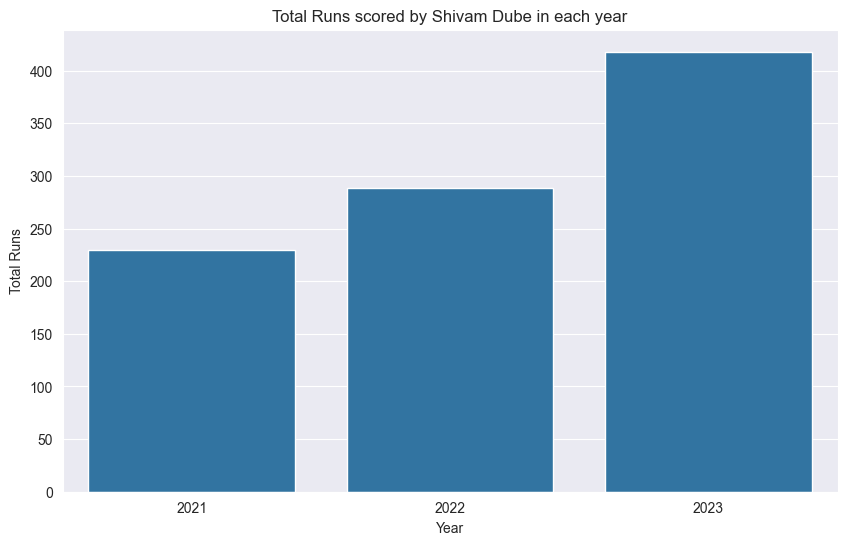

Total runs scored by the batter


year
2023    418.0
2022    289.0
2021    230.0
Name: batsman_runs, dtype: float64

In [200]:
#total runs scored by the batter in each year
total_runs=batter_ball_by_ball_data_last_3_years.groupby('year')['batsman_runs'].sum()
#plot total runs scored by the batter in each year
plt.figure(figsize=(10,6))
sns.barplot(x=total_runs.index,y=total_runs)
plt.xlabel('Year')
plt.ylabel('Total Runs')
plt.title('Total Runs scored by '+batter_name+' in each year')
plt.show()
print("Total runs scored by the batter")
total_runs=total_runs.sort_index(ascending=False)
total_runs

In [201]:
#create new data frame with year, total runs and total balls faced by the batter
batter_performance=pd.DataFrame({'year':total_runs.index,'total_runs':total_runs.values,'total_balls':total_balls.values})
#calculate strike rate for each year
batter_performance['strike_rate']=batter_performance['total_runs']/batter_performance['total_balls']*100
batter_performance

,year,total_runs,total_balls,strike_rate
0,2023,418.0,264,158.333333
1,2022,289.0,185,156.216216
2,2021,230.0,193,119.170984


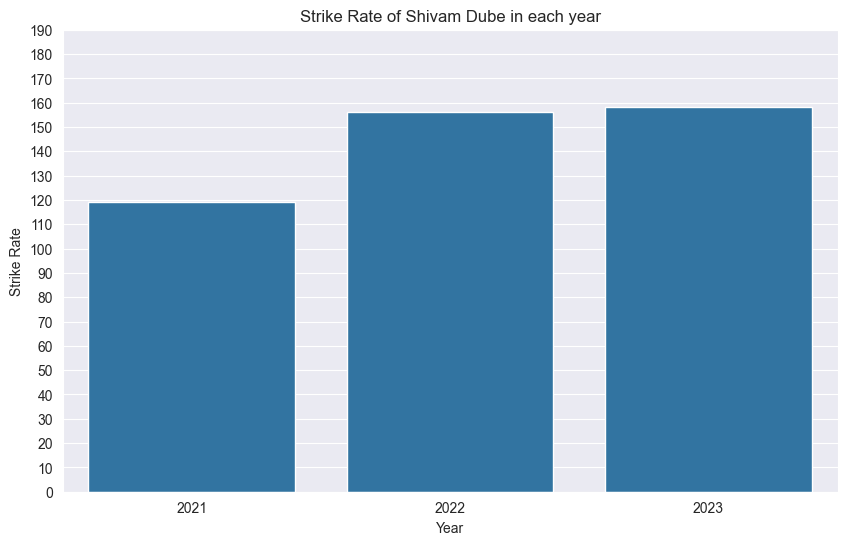

In [202]:
#plot strike rate of the batter in each year
plt.figure(figsize=(10,6))
sns.barplot(x=batter_performance['year'],y=batter_performance['strike_rate'])
plt.xlabel('Year')
plt.ylabel('Strike Rate')
plt.yticks(np.arange(0,200,10))
plt.title('Strike Rate of '+batter_name+' in each year')
plt.show()
#print total strike rate of the batter

In [203]:
#add new column bowling style to batter_ball_by_ball_data
batter_ball_by_ball_data_last_3_years['bowler_style']=batter_ball_by_ball_data_last_3_years['bowler_id'].apply(lambda x: players[players['player_id']==x]['bowling_style'].values[0])
batter_ball_by_ball_data_last_3_years['bowler_arm']=batter_ball_by_ball_data_last_3_years['bowler_id'].apply(lambda x: players[players['player_id']==x]['bowling_arm'].values[0])
batter_ball_by_ball_data_last_3_years

/var/folders/fd/_vqm4qqj113dx_9dmjpjrhfw0000gn/T/ipykernel_7930/4106689789.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batter_ball_by_ball_data_last_3_years['bowler_style']=batter_ball_by_ball_data_last_3_years['bowler_id'].apply(lambda x: players[players['player_id']==x]['bowling_style'].values[0])
/var/folders/fd/_vqm4qqj113dx_9dmjpjrhfw0000gn/T/ipykernel_7930/4106689789.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batter_ball_by_ball_data_last_3_years['bowler_arm']=batter_ball_by_ball_data

,series_id,match_id,innings_no,batsman_id,bowler_id,over_number,ball_number,over,total_runs,batsman_runs,...,legbyes,wides,noballs,penalties,out_player_id,current_innings_runs,current_innings_wickets,year,bowler_style,bowler_arm
2353,1298423,1304057,2.0,74975.0,101430.0,6.0,4.0,5.4,4.0,4.0,...,0.0,0.0,0.0,0.0,NaN,27.0,4.0,2022,left-arm medium-fast,left-arm
2354,1298423,1304057,2.0,74975.0,101430.0,6.0,5.0,5.5,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,27.0,4.0,2022,left-arm medium-fast,left-arm
2355,1298423,1304057,2.0,74975.0,101430.0,6.0,6.0,5.6,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,27.0,4.0,2022,left-arm medium-fast,left-arm
2360,1298423,1304057,2.0,74975.0,107007.0,7.0,5.0,6.5,4.0,4.0,...,0.0,0.0,0.0,0.0,NaN,36.0,4.0,2022,right-arm fast-medium,right-arm
2361,1298423,1304057,2.0,74975.0,107007.0,7.0,6.0,6.6,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,36.0,4.0,2022,right-arm fast-medium,right-arm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231603,1345038,1359507,1.0,74975.0,51012.0,17.0,1.0,16.1,1.0,1.0,...,0.0,0.0,0.0,0.0,NaN,170.0,2.0,2023,right-arm fast,right-arm
231607,1345038,1359507,1.0,74975.0,51012.0,17.0,5.0,16.4,1.0,1.0,...,0.0,0.0,0.0,0.0,NaN,179.0,2.0,2023,right-arm fast,right-arm
231611,1345038,1359507,1.0,74975.0,96758.0,18.0,1.0,17.1,2.0,2.0,...,0.0,0.0,0.0,0.0,NaN,188.0,2.0,2023,left-arm medium-fast,left-arm
231612,1345038,1359507,1.0,74975.0,96758.0,18.0,2.0,17.2,6.0,6.0,...,0.0,0.0,0.0,0.0,NaN,194.0,2.0,2023,left-arm medium-fast,left-arm


In [204]:
print("Runs scored against each bowler arm:",batter_ball_by_ball_data_last_3_years.groupby('bowler_arm')['batsman_runs'].sum())

Runs scored against each bowler arm: bowler_arm
left-arm     151.0
right-arm    786.0
Name: batsman_runs, dtype: float64


In [205]:
# Calculate the percentage of runs scored against each bowler arm in a variable
against_bowler_arm_df=round(batter_ball_by_ball_data_last_3_years.groupby('bowler_arm')['batsman_runs'].sum()*100/batter_ball_by_ball_data['batsman_runs'].sum(),2)
print("Percentage of runs scored against each bowler arm :",against_bowler_arm_df)


Percentage of runs scored against each bowler arm : bowler_arm
left-arm     13.65
right-arm    71.07
Name: batsman_runs, dtype: float64


In [206]:
print("Balls faced against each bowler arm:",batter_ball_by_ball_data_last_3_years.groupby('bowler_arm').size())

Balls faced against each bowler arm: bowler_arm
left-arm     107
right-arm    569
dtype: int64


In [207]:
#calculate percentage of balls faced against each bowler arm
against_bowler_arm_df=round(batter_ball_by_ball_data_last_3_years.groupby('bowler_arm').size()*100/len(batter_ball_by_ball_data),2)
print("Percentage of balls faced against each bowler arm :",against_bowler_arm_df)

Percentage of balls faced against each bowler arm : bowler_arm
left-arm     13.08
right-arm    69.56
dtype: float64


In [208]:
# Group by Bowler_Arm and calculate total runs and balls
bowler_arm_sr = batter_ball_by_ball_data_last_3_years.groupby('bowler_arm').agg(
    total_runs=pd.NamedAgg(column='batsman_runs', aggfunc='sum'),
    total_balls=pd.NamedAgg(column='ball_number', aggfunc='count')
).reset_index()

# Calculate strike rate
bowler_arm_sr['strike_rate'] = (bowler_arm_sr['total_runs'] / bowler_arm_sr['total_balls']) * 100
print("Strike rate against each bowler arm",)
bowler_arm_sr[['bowler_arm','strike_rate']]

Strike rate against each bowler arm


,bowler_arm,strike_rate
0,left-arm,141.121495
1,right-arm,138.137083


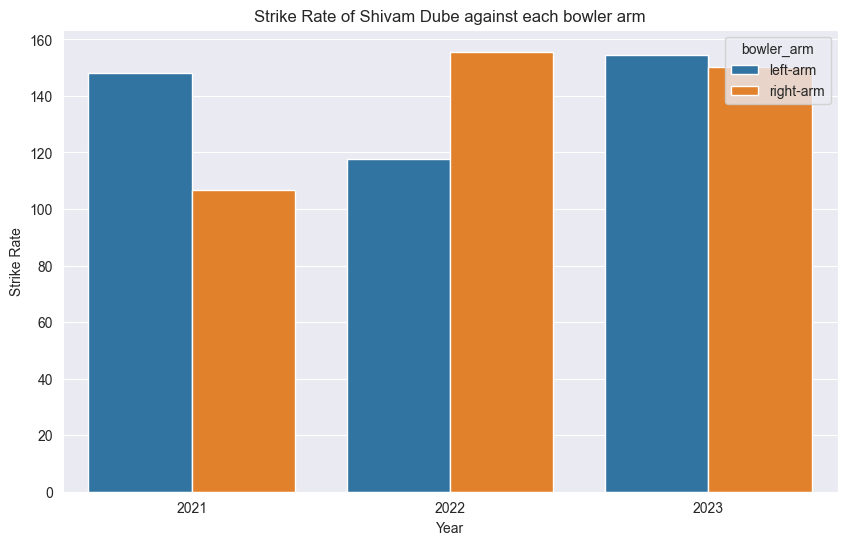

In [209]:
#add year also to the above calculation
bowler_arm_sr_year = batter_ball_by_ball_data_last_3_years.groupby(['year','bowler_arm']).agg(
    total_runs=pd.NamedAgg(column='batsman_runs', aggfunc='sum'),
    total_balls=pd.NamedAgg(column='ball_number', aggfunc='count')
).reset_index()
bowler_arm_sr_year['strike_rate'] = (bowler_arm_sr_year['total_runs'] / bowler_arm_sr_year['total_balls']) * 100
#plot strike rate against each bowler arm in each year with hue for bowler arm
plt.figure(figsize=(10,6))
sns.barplot(x='year',y='strike_rate',hue='bowler_arm',data=bowler_arm_sr_year)
plt.xlabel('Year')
plt.ylabel('Strike Rate')
plt.title('Strike Rate of '+batter_name+' against each bowler arm')
plt.savefig('./images/dube/dube_sr_bowler_arm.png',bbox_inches='tight')

plt.show()


##  Insights : Strike rate against right arm bowlers is better than left arm bowlers

In [210]:
categories = [
    "left-arm fast-medium", "left-arm medium", "left-arm medium-fast",
    "left-arm wrist-spin", "right-arm fast", "right-arm fast-medium",
    "right-arm leg break", "right-arm medium", "right-arm medium-fast",
    "right-arm offbreak", "slow left-arm orthodox"
]

# Create a color map
cmap = plt.get_cmap('tab20')  # This colormap has 20 distinct colors
colors = cmap.colors  # Get the list of colors from the colormap

# Assign a color to each category
color_map = {category: colors[i] for i, category in enumerate(categories)}
color_map

{'left-arm fast-medium': (0.12156862745098039,
  0.4666666666666667,
  0.7058823529411765),
 'left-arm medium': (0.6823529411764706,
  0.7803921568627451,
  0.9098039215686274),
 'left-arm medium-fast': (1.0, 0.4980392156862745, 0.054901960784313725),
 'left-arm wrist-spin': (1.0, 0.7333333333333333, 0.47058823529411764),
 'right-arm fast': (0.17254901960784313,
  0.6274509803921569,
  0.17254901960784313),
 'right-arm fast-medium': (0.596078431372549,
  0.8745098039215686,
  0.5411764705882353),
 'right-arm leg break': (0.8392156862745098,
  0.15294117647058825,
  0.1568627450980392),
 'right-arm medium': (1.0, 0.596078431372549, 0.5882352941176471),
 'right-arm medium-fast': (0.5803921568627451,
  0.403921568627451,
  0.7411764705882353),
 'right-arm offbreak': (0.7725490196078432,
  0.6901960784313725,
  0.8352941176470589),
 'slow left-arm orthodox': (0.5490196078431373,
  0.33725490196078434,
  0.29411764705882354)}

# Analyzing stike rate against  bowler_style

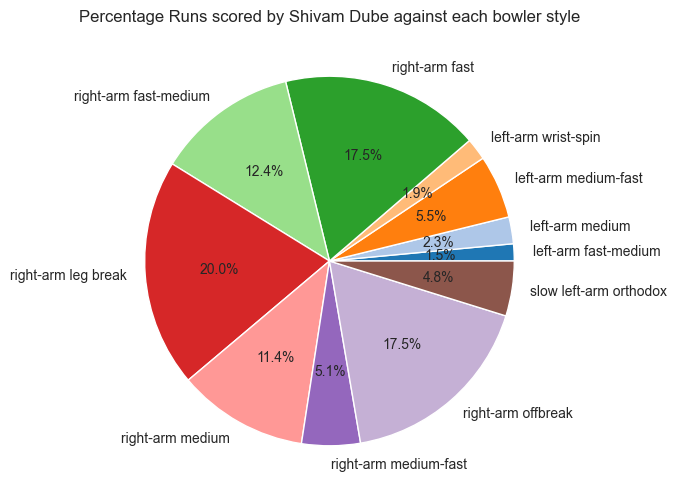

Runs scored against each bowler style


In [211]:
#calculate runs scored against each bowler style
runs_scored_bowler_style=batter_ball_by_ball_data_last_3_years.groupby('bowler_style')['batsman_runs'].sum()
#plot runs scored against each bowler style in pie chart
plt.figure(figsize=(10,6))
plt.pie(runs_scored_bowler_style,labels=runs_scored_bowler_style.index,autopct='%1.1f%%',colors=colors)
plt.title('Percentage Runs scored by '+batter_name+' against each bowler style')
plt.savefig('./images/dube/dube_sr_pie.png',bbox_inches='tight')

plt.show()

print("Runs scored against each bowler style")


In [212]:
#calculate strike rate against each bowler style
strike_rate_bowler_style=batter_ball_by_ball_data_last_3_years.groupby('bowler_style').agg(
    total_runs=pd.NamedAgg(column='batsman_runs', aggfunc='sum'),
    total_balls=pd.NamedAgg(column='ball_number', aggfunc='count')
)
strike_rate_bowler_style['strike_rate']=(strike_rate_bowler_style['total_runs']/strike_rate_bowler_style['total_balls'])*100
strike_rate_bowler_style


,total_runs,total_balls,strike_rate
bowler_style,,,
left-arm fast-medium,14.0,13,107.692308
left-arm medium,22.0,12,183.333333
left-arm medium-fast,52.0,36,144.444444
left-arm wrist-spin,18.0,14,128.571429
right-arm fast,164.0,129,127.131783
right-arm fast-medium,116.0,75,154.666667
right-arm leg break,187.0,117,159.829060
right-arm medium,107.0,98,109.183673
right-arm medium-fast,48.0,32,150.000000


/var/folders/fd/_vqm4qqj113dx_9dmjpjrhfw0000gn/T/ipykernel_7930/3596858507.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


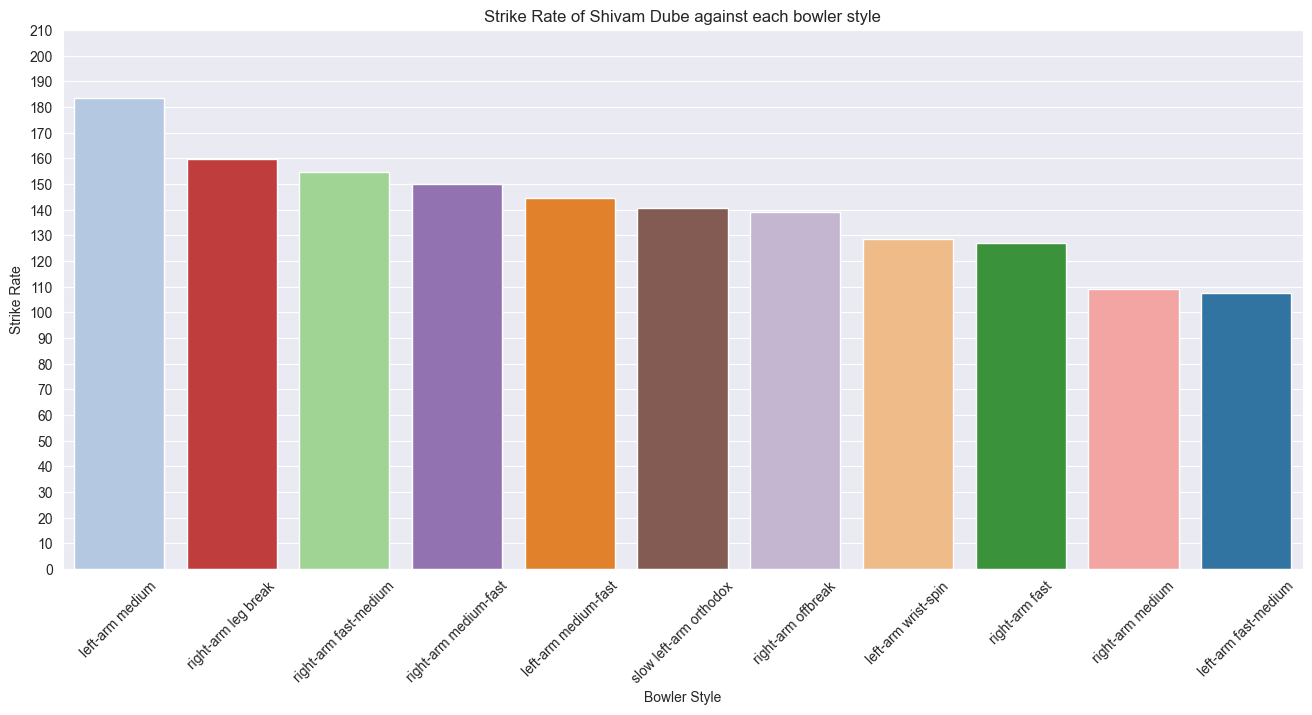

In [213]:
# Calculate the sorted order for consistent visualization
sorted_index = strike_rate_bowler_style.sort_values('strike_rate', ascending=False).index

# Generate colors based on the sorted index
colors_sorted = [color_map[style] for style in sorted_index]

# Set up the plot dimensions
plt.figure(figsize=(16, 7))

# Create the bar plot with ordered data and corresponding colors
sns.barplot(
    x=strike_rate_bowler_style.index,
    y=strike_rate_bowler_style['strike_rate'],
    order=sorted_index,
    palette=colors_sorted
)

# Set plot labels and title
plt.xlabel('Bowler Style')
plt.ylabel('Strike Rate')
plt.title('Strike Rate of ' + batter_name + ' against each bowler style')

# Set y-ticks and rotate x-ticks for better readability
plt.yticks(np.arange(0, 220, 10))
plt.xticks(rotation=45)

# Save the plot to a file
plt.savefig('./images/dube/dube_sr.png', bbox_inches='tight')

# Display the plot
plt.show()

/var/folders/fd/_vqm4qqj113dx_9dmjpjrhfw0000gn/T/ipykernel_7930/3635482598.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


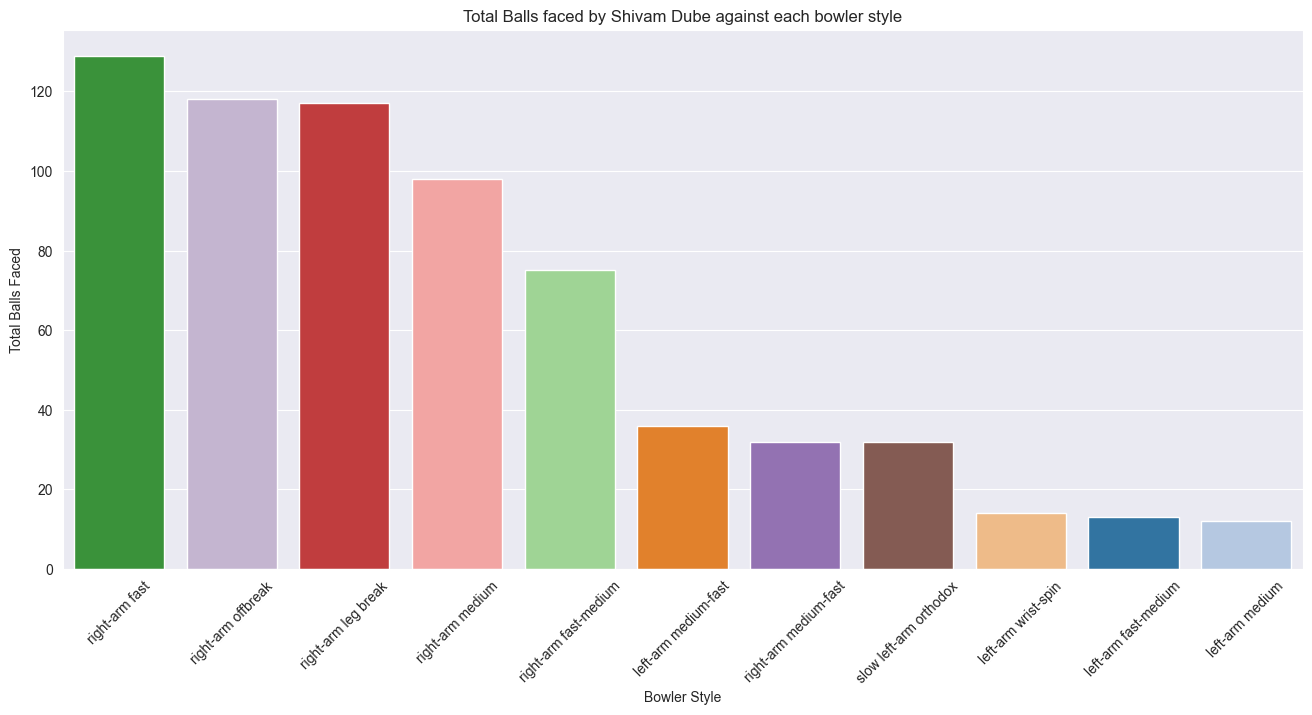

In [214]:

# Set up the plot dimensions
plt.figure(figsize=(16, 7))
sorted_index = strike_rate_bowler_style.sort_values('total_balls', ascending=False).index
colors_sorted = [color_map[style] for style in sorted_index]

# Create the bar plot with ordered data and corresponding colors
sns.barplot(
    x=strike_rate_bowler_style.index,
    y=strike_rate_bowler_style['total_balls'],
    order=sorted_index,
    palette=colors_sorted
)

# Set plot labels and title
plt.xlabel('Bowler Style')
plt.ylabel('Total Balls Faced')
plt.title('Total Balls faced by ' + batter_name + ' against each bowler style')

# Rotate x-ticks for better readability
plt.xticks(rotation=45)

# Save the plot to a file
plt.savefig('./images/dube/dube_balls_faced.png', bbox_inches='tight')

# Display the plot
plt.show()

### Insight : Strike rate against fast bowlers and medium pacers are good except fot left arm fast medium, where strike rate is 130ish  , but overall balls faced are less

Insights : Pretty consistent against all the bowler styles except for left arm orthodox , 
balls faced : 76, runs scored : 79, strike rate : 103
left arm wrist spin is also low, but balls faced are less, hence not much significance


# Calculating dismissals against each bowler-arm and bowler-style with focus on left-arm orthodox

In [215]:
without_runouts=batter_data[~batter_data['wickettype'].isin(['run out','not out'])]
print("Number of dismissals of" + batter_name +" without runouts",without_runouts['wickettype'].count())

Number of dismissals ofShivam Dube without runouts 37


In [216]:
without_runouts['dismissal_bowler_style']=without_runouts['bowler_id'].apply(lambda x: players[players['player_id']==x]['bowling_style'].values[0])
without_runouts['dismissal_bowler_arm']=without_runouts['bowler_id'].apply(lambda x: players[players['player_id']==x]['bowling_arm'].values[0])
without_runouts

/var/folders/fd/_vqm4qqj113dx_9dmjpjrhfw0000gn/T/ipykernel_7930/2597127721.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  without_runouts['dismissal_bowler_style']=without_runouts['bowler_id'].apply(lambda x: players[players['player_id']==x]['bowling_style'].values[0])
/var/folders/fd/_vqm4qqj113dx_9dmjpjrhfw0000gn/T/ipykernel_7930/2597127721.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  without_runouts['dismissal_bowler_arm']=without_runouts['bowler_id'].apply(lambda x: players[players['player_i

,match_id,innings,team,batsman_id,batsman_position,runs,balls,fours,sixes,strikerate,isout,wickettype,fielders,bowler_id,year,dismissal_bowler_style,dismissal_bowler_arm
0,1175366,2,RCB,74975.0,6.0,5.0,7.0,1.0,0.0,71.42,True,caught,{64479},46888.0,2019,right-arm offbreak,right-arm
1,1175356,1,RCB,74975.0,6.0,2.0,5.0,0.0,0.0,40.00,True,caught,{10125},19422.0,2019,right-arm leg break,right-arm
3,1178421,2,RCB,74975.0,4.0,24.0,16.0,0.0,2.0,150.00,True,caught,{15887},12562.0,2019,right-arm leg break,right-arm
4,1216499,1,RCB,74975.0,5.0,2.0,6.0,0.0,0.0,33.33,True,caught,{61990},70640.0,2020,right-arm fast,right-arm
5,1216510,2,RCB,74975.0,7.0,12.0,12.0,0.0,1.0,100.00,True,bowled,NaN,54222.0,2020,right-arm offbreak,right-arm
8,1216531,1,RCB,74975.0,5.0,23.0,19.0,0.0,2.0,121.05,True,caught,{60530},51421.0,2020,right-arm fast-medium,right-arm
11,1216519,2,RCB,74975.0,7.0,11.0,12.0,0.0,1.0,91.66,True,bowled,NaN,67296.0,2020,right-arm fast,right-arm
12,1237178,1,RCB,74975.0,6.0,8.0,13.0,0.0,0.0,61.53,True,caught,{48739},59339.0,2020,right-arm medium-fast,right-arm
13,1216505,1,RCB,74975.0,6.0,17.0,11.0,2.0,1.0,154.54,True,caught,{51096},67296.0,2020,right-arm fast,right-arm
15,1254073,1,Royals,74975.0,5.0,46.0,32.0,5.0,2.0,143.75,True,caught,{54222},50709.0,2021,right-arm fast-medium,right-arm


## checking dismissals against each bowler arm in last 3 years

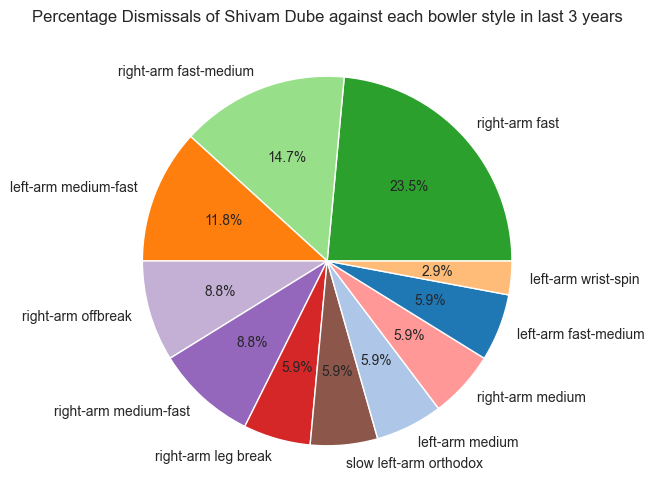

In [217]:
#plot dismissals against each bowler style in pie chart for the last 3 years
dismissals_bowler_style_last_3_years=without_runouts[without_runouts['year']>=2020]['dismissal_bowler_style'].value_counts()
pie_colors = [color_map[style] for style in dismissals_bowler_style_last_3_years.index]

# Create the pie chart
plt.figure(figsize=(10, 6))
plt.pie(
    dismissals_bowler_style_last_3_years,
    labels=dismissals_bowler_style_last_3_years.index,
    autopct='%1.1f%%',
    colors=pie_colors  # Apply the sorted colors
)
plt.title('Percentage Dismissals of ' + batter_name + ' against each bowler style in last 3 years')

# Save the figure
plt.savefig('./images/dube/dube_dismissal_pie.png', bbox_inches='tight')

# Show the plot
plt.show()


In [218]:
# compute balls faced against each bowler style in last 3 years 
balls_faced_bowler_style_last_3_years = batter_ball_by_ball_data_last_3_years.groupby('bowler_style').size()
balls_faced_bowler_style_last_3_years

bowler_style
left-arm fast-medium       13
left-arm medium            12
left-arm medium-fast       36
left-arm wrist-spin        14
right-arm fast            129
right-arm fast-medium      75
right-arm leg break       117
right-arm medium           98
right-arm medium-fast      32
right-arm offbreak        118
slow left-arm orthodox     32
dtype: int64

In [219]:
# Calculate the ratio of dismissals to balls faced for last 3 years
dismissal_to_balls_ratio_last_3_years = dismissals_bowler_style_last_3_years / balls_faced_bowler_style_last_3_years
dismissal_to_balls_ratio_last_3_years

left-arm fast-medium      0.153846
left-arm medium           0.166667
left-arm medium-fast      0.111111
left-arm wrist-spin       0.071429
right-arm fast            0.062016
right-arm fast-medium     0.066667
right-arm leg break       0.017094
right-arm medium          0.020408
right-arm medium-fast     0.093750
right-arm offbreak        0.025424
slow left-arm orthodox    0.062500
dtype: float64

In [220]:
# Calculate balls per dismissal (inverse of the ratio) for last 3 years
balls_per_dismissal_last_3_years = balls_faced_bowler_style_last_3_years / dismissals_bowler_style_last_3_years
#rename to dismissal_ratio
balls_per_dismissal_last_3_years.rename('dismissal_ratio',inplace=True)
balls_per_dismissal_last_3_years.sort_values(ascending=True)



left-arm medium            6.000000
left-arm fast-medium       6.500000
left-arm medium-fast       9.000000
right-arm medium-fast     10.666667
left-arm wrist-spin       14.000000
right-arm fast-medium     15.000000
slow left-arm orthodox    16.000000
right-arm fast            16.125000
right-arm offbreak        39.333333
right-arm medium          49.000000
right-arm leg break       58.500000
Name: dismissal_ratio, dtype: float64

In [221]:
# Combine the balls per dismissal with total balls faced into a comprehensive statement for last 3 years
combined_results_last_3_years = pd.DataFrame({
    'balls_per_dismissal': balls_per_dismissal_last_3_years.round(1),
    'total_balls_faced': balls_faced_bowler_style_last_3_years
})
#sort the combined results by balls per dismissal
combined_results_last_3_years.sort_values('balls_per_dismissal',ascending=True,inplace=True)
def format_results(row, idx):
    print(f"{row['balls_per_dismissal']} balls bowled by {idx} bowler. Total balls faced: {row['total_balls_faced']}.")
print(f"Batter {batter_name} is dismissed for every:")
formatted_results = combined_results_last_3_years.apply(lambda row: format_results(row, row.name), axis=1)

Batter Shivam Dube is dismissed for every:
6.0 balls bowled by left-arm medium bowler. Total balls faced: 12.0.
6.5 balls bowled by left-arm fast-medium bowler. Total balls faced: 13.0.
9.0 balls bowled by left-arm medium-fast bowler. Total balls faced: 36.0.
10.7 balls bowled by right-arm medium-fast bowler. Total balls faced: 32.0.
14.0 balls bowled by left-arm wrist-spin bowler. Total balls faced: 14.0.
15.0 balls bowled by right-arm fast-medium bowler. Total balls faced: 75.0.
16.0 balls bowled by slow left-arm orthodox bowler. Total balls faced: 32.0.
16.1 balls bowled by right-arm fast bowler. Total balls faced: 129.0.
39.3 balls bowled by right-arm offbreak bowler. Total balls faced: 118.0.
49.0 balls bowled by right-arm medium bowler. Total balls faced: 98.0.
58.5 balls bowled by right-arm leg break bowler. Total balls faced: 117.0.


### Insight : We can see that he has been dismissed every 11 balls by left-arm orthodox in last 3 years , which is second in the list. There are better candidates too , hence need to compute average

## Since strike rate is poor and dismissals ratio are high against left-arm orthodox in last 3 years, we can say that he is struggling against left-arm orthodox, checking AVERAGE against each bowler arm and bowler style

# Average calculation

In [222]:
#caclulate average each year from batter_data
average_year = batter_data.groupby('year').agg(
    total_runs=pd.NamedAgg(column='runs', aggfunc='sum'),
    total_dismissals=pd.NamedAgg(column='isout', 
                                 aggfunc=lambda x: x.astype(int).sum())
)
#change True to 1
average_year['average'] = (average_year['total_runs'] / average_year['total_dismissals']).round(2)
average_year=average_year.sort_index(ascending=False)

average_year

,total_runs,total_dismissals,average
year,,,
2023,418.0,11,38.00
2022,289.0,10,28.90
2021,230.0,8,28.75
2020,129.0,7,18.43
2019,40.0,3,13.33


Note : This coincides with the official site

In [223]:
#print overall average
print("Overall Average of the batter")
average_year['total_runs'].sum()/average_year['total_dismissals'].sum()


Overall Average of the batter


28.358974358974358

In [224]:
batter_data['wickettype'].value_counts()

wickettype
caught     28
not out     8
bowled      7
run out     2
lbw         2
Name: count, dtype: int64

In [225]:
#runout will be considered as not out during ball by ball calculation, to asses performance against bowler arm and style
##hence need to  check the year in runouts have occured from batter_data
batter_data[batter_data['wickettype']=='run out']['year'].value_counts()

year
2020    1
2022    1
Name: count, dtype: int64

In [226]:
#group by match_id and count number of dismissals using iswicket
dismissals_per_match=batter_ball_by_ball_data.groupby(['match_id'])['iswicket'].sum()
#check if any match has more than 1 dismissal]
print(dismissals_per_match[dismissals_per_match>1].index)
#check for these match_id,if batter was dimissed from batter_data
batter_data[batter_data['match_id'].isin(dismissals_per_match[dismissals_per_match>1].index)]['isout'].unique()


Index([1175366], dtype='int64', name='match_id')


array([True], dtype=object)

In [227]:
dismissals_per_match

match_id
1175356    1
1175362    0
1175366    2
1178421    1
1216499    1
1216505    1
1216510    1
1216519    1
1216525    0
1216531    1
1216534    1
1216547    0
1237178    1
1254061    1
1254064    1
1254069    1
1254073    1
1254075    1
1254081    1
1254089    0
1254093    1
1254106    1
1304047    1
1304053    1
1304057    1
1304063    1
1304068    0
1304075    0
1304079    1
1304084    1
1304101    1
1304105    1
1304108    1
1359475    1
1359480    1
1359486    1
1359491    1
1359498    1
1359507    1
1359511    1
1359515    1
1359523    0
1359529    1
1359535    0
1359541    1
1370350    1
1370353    0
Name: iswicket, dtype: object

### Checking trend in last 3 years

In [228]:
batter_ball_by_ball_data_last_3_years[batter_ball_by_ball_data_last_3_years['match_id'].isin(dismissals_per_match[dismissals_per_match>1].index) & (batter_ball_by_ball_data_last_3_years['iswicket']==1)]

,series_id,match_id,innings_no,batsman_id,bowler_id,over_number,ball_number,over,total_runs,batsman_runs,...,legbyes,wides,noballs,penalties,out_player_id,current_innings_runs,current_innings_wickets,year,bowler_style,bowler_arm


In [229]:
#compute average against each bowler style in last 3 years
average_bowler_style_last_3_years = batter_ball_by_ball_data_last_3_years.groupby('bowler_style').agg(
    total_runs=pd.NamedAgg(column='batsman_runs', aggfunc='sum'),
    total_dismissals=pd.NamedAgg(column='iswicket', aggfunc=lambda x: x.sum())
)
average_bowler_style_last_3_years['average'] = (average_bowler_style_last_3_years['total_runs'] / average_bowler_style_last_3_years['total_dismissals']).round(2)
average_bowler_style_last_3_years=average_bowler_style_last_3_years.sort_values('average',ascending=False)
average_bowler_style_last_3_years

,total_runs,total_dismissals,average
bowler_style,,,
right-arm leg break,187.0,2,93.5
right-arm offbreak,164.0,2,82.0
right-arm medium,107.0,2,53.5
right-arm fast,164.0,5,32.8
right-arm fast-medium,116.0,4,29.0
right-arm medium-fast,48.0,2,24.0
slow left-arm orthodox,45.0,2,22.5
left-arm wrist-spin,18.0,1,18.0
left-arm medium-fast,52.0,4,13.0


/var/folders/fd/_vqm4qqj113dx_9dmjpjrhfw0000gn/T/ipykernel_7930/3252576558.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


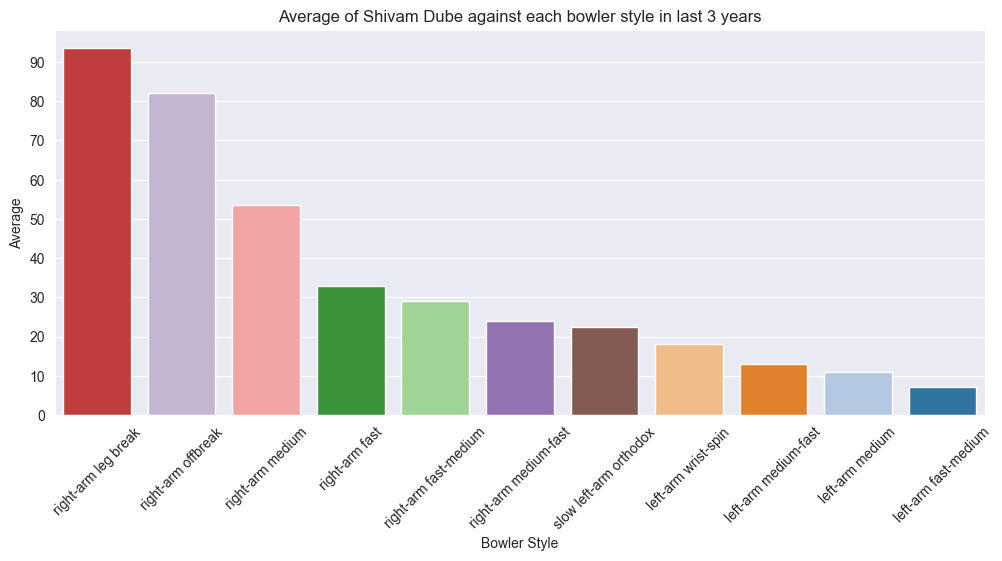

In [231]:
# Set up the plot dimensions
plt.figure(figsize=(12, 5))
sorted_index = average_bowler_style_last_3_years.sort_values('average', ascending=False).index
colors_sorted = [color_map[style] for style in sorted_index]
# Create the bar plot with ordered data and corresponding colors
sns.barplot(
    x=average_bowler_style_last_3_years.index,
    y=average_bowler_style_last_3_years['average'],
    order=sorted_index,
    palette=colors_sorted,
    legend=False
)

# Set plot labels and title
plt.xlabel('Bowler Style')
plt.ylabel('Average')
plt.title('Average of ' + batter_name + ' against each bowler style in last 3 years')

# Adjust y-ticks and rotate x-ticks for better readability
plt.yticks(np.arange(0, 100, 10))
plt.xticks(rotation=45)

# Save the plot to a file
plt.savefig('./images/dube/dube_avg.jpg', bbox_inches='tight')

# Display the plot
plt.show()


## Inisghts : 
1. Average against left arm orthodox is 13.17 , which is the lowest , hence he is struggling against left arm orthodox,
2. Average is nearing 30 for right-arm medium, but his strike rate is good

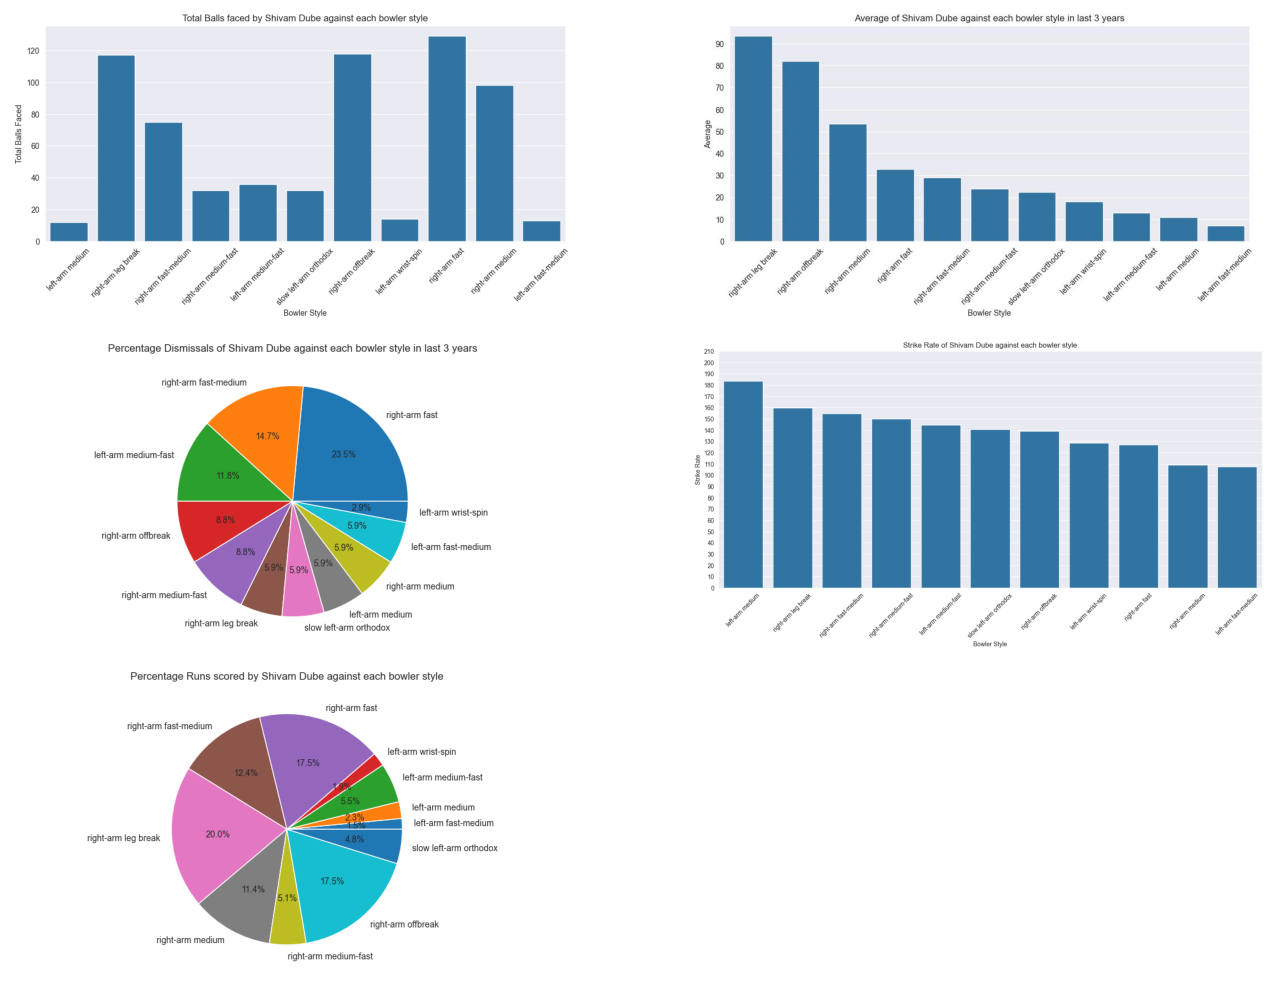

In [89]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Paths to your images
img_paths = [
    './images/dube/dube_balls_faced.png',
    './images/dube/dube_avg.jpg',
    './images/dube/dube_dismissal_pie.png',
    './images/dube/dube_sr.png',
    './images/dube/dube_sr_pie.png'
]

# Set up the figure
fig, axs = plt.subplots(3, 2, figsize=(15, 10))  # Adjust the size as needed

# Remove the empty subplot (if the number of images is odd)
if len(img_paths) % 2 != 0:
    fig.delaxes(axs.flatten()[-1])

# Iterate over image paths and axes to place each image
for ax, img_path in zip(axs.flatten(), img_paths):
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.axis('off')  # Hide axes

plt.tight_layout()
plt.savefig('./images/dube/dube_combined.jpg',bbox_inches='tight')
plt.show()
